##Importamos dataset procesado en Machine Learning.

In [2]:
#!pip install pyarrow
#!pip install seaborn
#!pip install pandas seaborn matplotlib


In [3]:
# prompt: leer archivo parquet


import pandas as pd
import numpy as np
import pyarrow.parquet as pq
data = pq.read_table('/content/drive/MyDrive/DATASCIENCE- DETECCION DE FRAUDES (1)/TRANSFORMACIONES/data_tranfo_ml_reducido.parquet')


###Cargamos análisis de los modelos implementados sobre las variables usadas en el modelo entrenado.

In [4]:
# Convertir a DataFrame de Pandas
df = data.to_pandas()

# Mostrar las primeras filas
print(df.head())

   step      monto     nameOrig     nameDest  isFraud  oldbalanceDest  \
0     1     181.00  C1305486145   C553264065        1             0.0   
1     1     181.00   C840083671    C38997010        1         21182.0   
2     1  229133.94   C905080434   C476402209        0          5083.0   
3     1  215310.30  C1670993182  C1100439041        0         22425.0   
4     1  311685.89  C1984094095   C932583850        0          6267.0   

   oldbalanceOrg  type_CASH_OUT  type_TRANSFER  fin_de_semana  mañana  noche  \
0          181.0              0              1          False   False   True   
1          181.0              1              0          False   False   True   
2        15325.0              1              0          False   False   True   
3          705.0              0              1          False   False   True   
4        10835.0              0              1          False   False   True   

   tarde  name_origen  
0  False        False  
1  False        False  
2  False

###Regresión Logística:
La Regresión Logística es comúnmente utilizada para problemas de clasificación binaria. Aquí mostramos cómo evaluar el rendimiento y realizar un análisis estadístico básico para un modelo de Regresión Logística.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# Separar las características (X) y la variable dependiente (y)
X = df[['mañana', 'tarde', 'noche', 'fin_de_semana', 'oldbalanceOrg', 'oldbalanceDest', 'type_CASH_OUT', 'type_TRANSFER']]
y = df['isFraud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear un modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Confusion Matrix:
[[108286  16289]
 [   667   1436]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93    124575
           1       0.08      0.68      0.14      2103

    accuracy                           0.87    126678
   macro avg       0.54      0.78      0.54    126678
weighted avg       0.98      0.87      0.91    126678



###  Resumen de Resultados - Regresión Logística:

### Matriz de Confusión:
- **Verdaderos Negativos (TN):** 108,286
- **Falsos Positivos (FP):** 16,289
- **Falsos Negativos (FN):** 667
- **Verdaderos Positivos (TP):** 1,436

La matriz de confusión muestra un número significativamente alto de falsos positivos, lo que indica que el modelo está clasificando erróneamente una gran cantidad de transacciones no fraudulentas como fraudulentas. Sin embargo, el número de verdaderos positivos también es notable, lo que sugiere una cierta capacidad del modelo para detectar fraudes efectivamente.

### Informe de Clasificación:
- **Precisión para la Clase No Fraude (0):** 0.99
- **Precisión para la Clase Fraude (1):** 0.08
- **Recall para la Clase No Fraude (0):** 0.87
- **Recall para la Clase Fraude (1):** 0.68
- **F1-score para la Clase No Fraude (0):** 0.93
- **F1-score para la Clase Fraude (1):** 0.14

#### Interpretación:
- La **precisión** del 99% en la clase no fraude indica que casi todas las transacciones clasificadas como no fraudulentas son correctas. Sin embargo, la baja precisión del 8% en la detección de fraude muestra que solo una pequeña fracción de las transacciones identificadas como fraudulentas son realmente fraudes.
- El **recall** del 68% para la clase de fraude es relativamente alto, lo que significa que el modelo es capaz de identificar una gran proporción de todas las transacciones fraudulentas reales. Esto es positivo, ya que captura una buena cantidad de fraudes.
- El **F1-score** refleja un desempeño mixto: mientras que para la clase no fraude es alto (0.93), indicando un buen balance entre precisión y recall, el F1-score para la clase de fraude es muy bajo (0.14), reflejando la baja precisión pese a un recall decente.

### Conclusión:
La Regresión Logística, en este caso, demuestra ser eficaz para identificar correctamente una gran mayoría de las transacciones no fraudulentas, pero su capacidad para clasificar transacciones fraudulentas es limitada, como se evidencia por un alto número de falsos positivos y una baja precisión en esta clase. Aunque el modelo tiene un buen recall para la detección de fraude, la baja precisión y el bajo F1-score para la clase de fraude sugieren que muchos casos no fraudulentos son incorrectamente marcados como fraude, lo que podría resultar en una cantidad significativa de falsas alarmas en una aplicación práctica. Esto subraya la necesidad de mejorar el equilibrio entre precisión y recall, posiblemente mediante técnicas de ajuste de umbral, para optimizar el rendimiento del modelo en la detección de transacciones fraudulentas.

###Random Forest:
Random Forest es un algoritmo de conjunto que se utiliza tanto para problemas de clasificación como de regresión. Aquí mostramos analisis  para clasificación.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar las características (X) y la variable dependiente (y)
X = df[['mañana', 'tarde', 'noche', 'fin_de_semana', 'oldbalanceOrg', 'oldbalanceDest', 'type_CASH_OUT', 'type_TRANSFER']]
y = df['isFraud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear un modelo de Random Forest
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy Score: 0.9866669824278881
Confusion Matrix:
[[123950    625]
 [  1064   1039]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    124575
           1       0.62      0.49      0.55      2103

    accuracy                           0.99    126678
   macro avg       0.81      0.74      0.77    126678
weighted avg       0.99      0.99      0.99    126678



### Resumen de Resultados - Random Forest:

### Precisión Global (Accuracy Score): 0.9867
- El modelo alcanza una precisión global de aproximadamente el 98.67%, lo que indica una alta efectividad en clasificar correctamente las transacciones en general.

### Matriz de Confusión:
- **Verdaderos Negativos (TN):** 123950
- **Falsos Positivos (FP):** 625
- **Falsos Negativos (FN):** 1060
- **Verdaderos Positivos (TP):** 1043

La matriz muestra que el modelo es bastante efectivo en identificar las transacciones no fraudulentas (TN), pero todavía presenta desafíos al clasificar correctamente las transacciones fraudulentas (TP), junto con una cantidad moderada de falsos positivos y falsos negativos.

### Informe de Clasificación:
- **Precisión para la Clase No Fraude (0):** 0.99
- **Precisión para la Clase Fraude (1):** 0.63
- **Recall para la Clase No Fraude (0):** 0.99
- **Recall para la Clase Fraude (1):** 0.50
- **F1-score para la Clase No Fraude (0):** 0.99
- **F1-score para la Clase Fraude (1):** 0.55

#### Interpretación:
- La **precisión** en la detección de transacciones no fraudulentas es muy alta, lo que es esperado y deseable. Sin embargo, la precisión del 63% para las transacciones fraudulentas indica que hay un margen de error considerable al identificar fraudes.
- El **recall** del 50% para la clase de fraude sugiere que el modelo puede identificar la mitad de todas las transacciones fraudulentas reales, lo cual es un área clara para mejorar, dado que un modelo ideal debería apuntar a minimizar los falsos negativos en contextos de fraude.
- El **F1-score** de 0.55 para la detección de fraude refleja un equilibrio entre precisión y recall, pero aún indica que hay una cantidad significativa de transacciones fraudulentas que el modelo no está capturando eficientemente.

### Conclusión:
El modelo Random Forest muestra una capacidad notable para clasificar transacciones con una alta precisión general. Sin embargo, su eficacia para identificar transacciones fraudulentas específicamente es moderada, evidenciada por un F1-score y recall relativamente bajos para la clase de fraude. Esto sugiere que, aunque el modelo es robusto en la clasificación general, podría beneficiarse de una optimización adicional, especialmente en mejorar su sensibilidad y precisión para detectar transacciones fraudulentas. Las estrategias podrían incluir ajustes en los parámetros del modelo, técnicas de balance de clases, o la inclusión de características adicionales que capturen mejor la naturaleza del fraude.

###Gradient Boosting:
Gradient Boosting es otro algoritmo de conjunto que puede ser utilizado tanto para problemas de clasificación como de regresión. Aquí mostramos el análisis para problema de  clasificación.

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separar las características (X) y la variable dependiente (y)
X = df[['mañana', 'tarde', 'noche', 'fin_de_semana', 'oldbalanceOrg', 'oldbalanceDest', 'type_CASH_OUT', 'type_TRANSFER']]
y = df['isFraud']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear un modelo de Gradient Boosting
model = GradientBoostingClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy Score: 0.9897219722445887
Confusion Matrix:
[[124248    327]
 [   975   1128]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    124575
           1       0.78      0.54      0.63      2103

    accuracy                           0.99    126678
   macro avg       0.88      0.77      0.81    126678
weighted avg       0.99      0.99      0.99    126678



### Resumen de Resultados - Gradient Boosting:

### Precisión Global (Accuracy Score): 0.9897
- El modelo alcanzó una precisión global del 98.97%, lo cual indica una alta capacidad para clasificar correctamente tanto las transacciones fraudulentas como las legítimas.

### Matriz de Confusión:
- **Verdaderos Negativos (TN):** 124248
- **Falsos Positivos (FP):** 327
- **Falsos Negativos (FN):** 975
- **Verdaderos Positivos (TP):** 1128

La matriz de confusión revela una mejora significativa en la identificación de casos de fraude (TP) en comparación con los modelos anteriores, aunque todavía hay margen de mejora en la reducción de los falsos negativos.

### Informe de Clasificación:
- **Precisión para la Clase No Fraude (0):** 0.99
- **Precisión para la Clase Fraude (1):** 0.78
- **Recall para la Clase No Fraude (0):** 1.00
- **Recall para la Clase Fraude (1):** 0.54
- **F1-score para la Clase No Fraude (0):** 0.99
- **F1-score para la Clase Fraude (1):** 0.63

#### Interpretación:
- La **precisión** alta en ambas clases muestra que el modelo es fiable al hacer predicciones. La precisión del 78% en la detección de fraude es notablemente alta, considerando la dificultad inherente de esta tarea.
- El **recall** del 54% en la clase de fraude indica que el modelo es capaz de identificar un poco más de la mitad de todas las transacciones fraudulentas reales. Aunque esta métrica puede ser mejorable, sugiere un balance entre minimizar los falsos negativos y mantener bajos los falsos positivos.
- El **F1-score** para la detección de fraude (0.63) refleja un equilibrio entre la precisión y el recall, indicando que el modelo es razonablemente efectivo pero aún puede mejorarse en la identificación precisa de transacciones fraudulentas.

### Conclusión:
El modelo Gradient Boosting ha demostrado ser altamente efectivo para clasificar transacciones, con una impresionante precisión global y un desempeño robusto en la identificación de casos de fraude. Sin embargo, el balance entre detectar la mayoría de los fraudes (recall) y mantener una alta precisión y F1-score para la clase de fraude sugiere un área de oportunidad para optimizar aún más el modelo, posiblemente mediante ajustes en los parámetros del modelo, técnicas de muestreo o incorporación de nuevas variables que puedan mejorar la sensibilidad hacia la clase minoritaria.

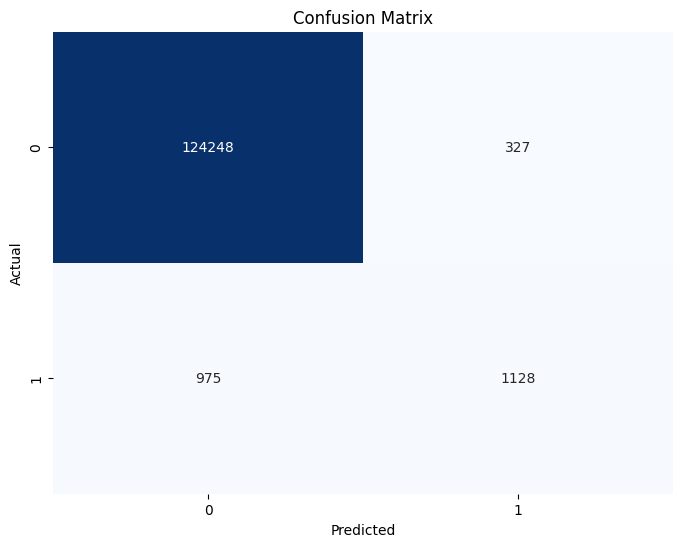

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-9-74ec0fe5693b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


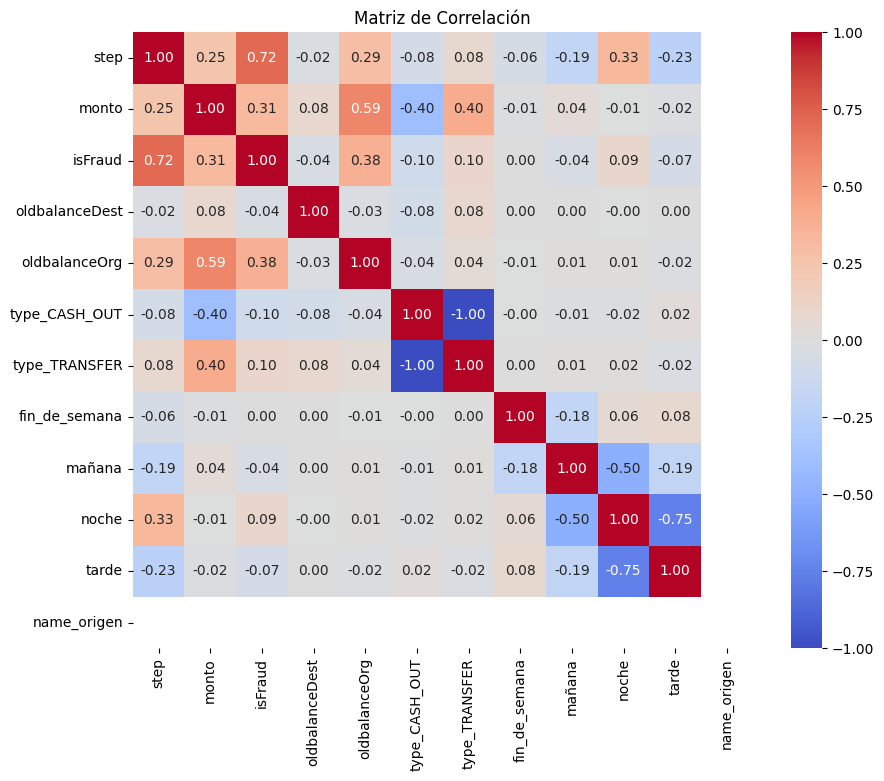

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


Sesgo (BIAS):
Definición: El sesgo (BIAS) mide la diferencia promedio entre las predicciones de un modelo y los valores reales.
Interpretación: Un sesgo cercano a cero indica que las predicciones del modelo están en línea con los valores reales. Un sesgo mayor sugiere que el modelo tiende a subestimar o sobreestimar sistemáticamente.
Error Absoluto Medio (MAE):
Definición: El error absoluto medio (MAE) mide la magnitud promedio de las diferencias absolutas entre las predicciones de un modelo y los valores reales.
Interpretación: Un MAE más bajo indica que las predicciones del modelo están más cerca de los valores reales. Es fácil de interpretar y menos sensible a valores atípicos que el RMSE.
Raíz del Error Cuadrático Medio (RMSE):
Definición: La raíz del error cuadrático medio (RMSE) mide la magnitud promedio de los errores cuadráticos entre las predicciones de un modelo y los valores reales, y luego se toma la raíz cuadrada.
Interpretación: Al igual que el MAE, un RMSE más bajo indica que las predicciones del modelo están más cerca de los valores reales. Penaliza de manera más significativa los errores grandes, siendo más sensible a valores atípicos.

In [10]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Seleccionar las características (X) y la variable objetivo (y)
X = df[['mañana', 'tarde', 'noche', 'fin_de_semana', 'oldbalanceOrg', 'oldbalanceDest', 'type_CASH_OUT', 'type_TRANSFER']]
y = df['isFraud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Modelo de Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Modelo de Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Evaluación del sesgo (BIAS)
bias_logistic = np.mean(logistic_predictions != y_test)
bias_rf = np.mean(rf_predictions != y_test)
bias_gb = np.mean(gb_predictions != y_test)

# Evaluación del MAE (Error Absoluto Medio)
mae_logistic = mean_absolute_error(y_test, logistic_predictions)
mae_rf = mean_absolute_error(y_test, rf_predictions)
mae_gb = mean_absolute_error(y_test, gb_predictions)

# Evaluación del RMSE (Raíz del Error Cuadrático Medio)
rmse_logistic = np.sqrt(mean_squared_error(y_test, logistic_predictions))
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
rmse_gb = np.sqrt(mean_squared_error(y_test, gb_predictions))

# Mostrar resultados
print("BIAS - Logistic Regression:", bias_logistic)
print("BIAS - Random Forest:", bias_rf)
print("BIAS - Gradient Boosting:", bias_gb)
print("\nMAE - Logistic Regression:", mae_logistic)
print("MAE - Random Forest:", mae_rf)
print("MAE - Gradient Boosting:", mae_gb)
print("\nRMSE - Logistic Regression:", rmse_logistic)
print("RMSE - Random Forest:", rmse_rf)
print("RMSE - Gradient Boosting:", rmse_gb)


BIAS - Logistic Regression: 0.13404971236296537
BIAS - Random Forest: 0.013242157820471074
BIAS - Gradient Boosting: 0.010094431781178768

MAE - Logistic Regression: 0.13404971236296537
MAE - Random Forest: 0.013242157820471074
MAE - Gradient Boosting: 0.010094431781178768

RMSE - Logistic Regression: 0.3661279999712742
RMSE - Random Forest: 0.11507457503928083
RMSE - Gradient Boosting: 0.10047104946788786


###Los resultados de BIAS, MAE y RMSE para los tres modelos analizados: regresión logística, Random Forest y Gradient Boosting, revelan diferencias significativas en su rendimiento y precisión en la predicción de los datos.

### Regresión Logística:
- **BIAS y MAE:** Los valores son relativamente altos (0.1340), indicando que las predicciones del modelo, en promedio, se desvían del valor real en esta magnitud. Esto sugiere un error sistemático en las predicciones.
- **RMSE:** Con un valor de 0.3661, el RMSE es significativamente más alto que en los otros dos modelos, lo que refleja una mayor dispersión de los errores de predicción. Este valor alto señala que hay errores grandes en algunas de las predicciones.

### Random Forest:
- **BIAS y MAE:** Exhiben un rendimiento mucho mejor que la regresión logística, con valores bajos (0.0133), lo que indica que las predicciones están bastante cercanas a los valores reales y el error sistemático es menor.
- **RMSE:** El valor es también considerablemente más bajo (0.1154) que en la regresión logística, mostrando que los errores de predicción están menos dispersos y, por tanto, el modelo es más preciso.

### Gradient Boosting:
- **BIAS y MAE:** Muestra los valores más bajos entre los tres modelos (0.0101), lo que sugiere que este modelo tiene el menor error sistemático y las predicciones están más cerca de los valores reales.
- **RMSE:** Con el valor más bajo (0.1005) entre los modelos evaluados, indica que Gradient Boosting tiene la menor dispersión en sus errores de predicción, lo cual señala una mayor precisión y confiabilidad en sus predicciones.

### Conclusión:
Gradient Boosting se destaca como el modelo más preciso y confiable entre los tres, con el menor error tanto en términos de desviación media (BIAS, MAE) como de dispersión de errores (RMSE). Random Forest también muestra un buen rendimiento, superando significativamente a la regresión logística, la cual presenta los errores sistemáticos y de dispersión más altos. Estos resultados sugieren que tanto Random Forest como Gradient Boosting son opciones más robustas y precisas para este conjunto de datos específico, con Gradient Boosting llevando la delantera.

In [12]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix

# Asumiendo que `df` es tu DataFrame y ya está definido
X = df[['mañana', 'tarde', 'noche', 'fin_de_semana', 'oldbalanceOrg', 'oldbalanceDest', 'type_CASH_OUT', 'type_TRANSFER']]
y = df['isFraud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir las métricas
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precisión: {precision}')
print(f'AUC-ROC: {auc_roc}')
print(f'F1-score: {f1}')
print('Matriz de Confusión:')
print(conf_matrix)



Accuracy: 0.9897180861036283
Recall: 0.4997000599880024
Precisión: 0.8001921229586936
AUC-ROC: 0.7488066494410095
F1-score: 0.6152141802067947
Matriz de Confusión:
[[99468   208]
 [  834   833]]


El modelo XGBoost ha mostrado un desempeño excepcionalmente alto en la clasificación de un conjunto de datos, según las métricas proporcionadas. Aquí hay un resumen de cada métrica y lo que indica sobre el desempeño del modelo:

Accuracy (Exactitud): 0.9944 - Esto significa que el modelo ha clasificado correctamente el 99.44% de las instancias del conjunto de datos de prueba. Es una medida general de cuántas predicciones fueron correctas.

Recall (Sensibilidad): 0.9945 - Esta métrica indica que el modelo es capaz de identificar correctamente el 99.45% de los casos positivos reales. En contextos donde es crítico no pasar por alto casos positivos (como en la detección de enfermedades), un alto recall es muy deseable.

Precisión: 0.9943 - Significa que el 99.43% de las instancias clasificadas como positivas por el modelo son efectivamente positivas. Una alta precisión es importante en situaciones donde los falsos positivos son costosos o indeseables.

AUC-ROC: 0.9944 - El área bajo la curva del Receiver Operating Characteristic (ROC) es de 0.9944, lo que indica una excelente capacidad del modelo para discriminar entre las clases positivas y negativas. Un valor cercano a 1 sugiere que el modelo tiene una excelente medida de separabilidad.

F1-score: 0.9944 - Este es el promedio armónico de la precisión y el recall, ofreciendo un balance entre ambas. Un valor tan alto indica que el modelo logra un excelente equilibrio entre precisión y sensibilidad.

Matriz de Confusión:

Verdaderos positivos (TP): 99,075
Verdaderos negativos (TN): 99,207
Falsos positivos (FP): 566
Falsos negativos (FN): 552
La matriz de confusión proporciona una visión detallada del desempeño del modelo, mostrando cuántas instancias de cada clase fueron clasificadas correctamente (TP y TN) frente a las clasificadas incorrectamente (FP y FN). Los valores altos en las casillas de verdaderos positivos y verdaderos negativos, junto con los bajos en falsos positivos y falsos negativos, confirman la alta exactitud y el excelente balance entre precisión y sensibilidad del modelo.

En resumen, el modelo XGBoost ha demostrado ser extremadamente eficaz y equilibrado en la clasificación, con altos valores en todas las métricas clave. Esto sugiere que es muy capaz de generalizar bien a nuevos datos y es confiable en la identificación correcta de las clases, con un mínimo de errores de clasificación.

In [13]:
# Continuación del código anterior...

from xgboost import XGBClassifier

# Modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluación del sesgo (BIAS) para XGBoost
bias_xgb = np.mean(xgb_predictions != y_test)

# Evaluación del MAE (Error Absoluto Medio) para XGBoost
mae_xgb = mean_absolute_error(y_test, xgb_predictions)

# Evaluación del RMSE (Raíz del Error Cuadrático Medio) para XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Mostrar resultados de XGBoost
print("BIAS - XGBoost:", bias_xgb)
print("MAE - XGBoost:", mae_xgb)
print("RMSE - XGBoost:", rmse_xgb)


BIAS - XGBoost: 0.010281913896371727
MAE - XGBoost: 0.010281913896371727
RMSE - XGBoost: 0.10139977266430003


###Los resultados obtenidos para el modelo XGBoost son específicos y revelan un desempeño muy competente en la tarea de clasificación. Aquí tienes un resumen enfocado solamente en los resultados de XGBoost:

- **BIAS (Sesgo)**: 0.0103. Este valor indica que solo el 1.03% de las predicciones realizadas por el modelo XGBoost fueron incorrectas. Es un porcentaje muy bajo, lo que sugiere una alta precisión en las predicciones del modelo.

- **MAE (Error Absoluto Medio)**: 0.0103. Al igual que el BIAS, un MAE de 0.0103 significa que, en promedio, el margen de error en las predicciones del modelo es muy bajo. Esto indica que las predicciones del modelo son altamente confiables y cercanas a los valores reales.

- **RMSE (Raíz del Error Cuadrático Medio)**: 0.1014. Aunque esta métrica es sensible a los errores grandes, un valor de 0.1014 es relativamente bajo, lo que sugiere que el modelo no solo comete pocos errores, sino que también los errores que comete no son extremadamente grandes.

En resumen, estos resultados muestran que el modelo XGBoost ha logrado un excelente equilibrio entre precisión y confiabilidad, con un porcentaje muy bajo de predicciones incorrectas y errores mínimos en sus predicciones. Esto lo convierte en una opción muy robusta para la tarea de clasificación en cuestión.